In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [4]:
#open URL 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_data = pd.read_csv('image-predictions.tsv', sep='\t' )
image_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Use Twitter API and Python's Tweepy library and store each tweet's set of JSON data in a file.

In [7]:
auth = tweepy.OAuthHandler('5Uur0mo4ol2kB8yhtZ1VxXS0u', 'h8E7fSpXWiMoBel7G1ZOAeu4Mgru0v0MtxH5ehYE1RKM89SiBH')
auth.set_access_token('303562412-ct9aNnU0FQR0UKJVn1i1W3Y8omqSewiQWUcRaygB', 'D3qslrbdOU5fqTOp951kOIuZbkeTPBodnjNYoEGFR63Ft')
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [8]:
#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
        
for tweet_id in df['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 559
Rate limit reached. Sleeping for: 558


In [9]:
print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets not found" , len(cant_find_tweets_for_those_ids))

The list of tweets 2331
The list of tweets not found 25


In [10]:
#Then in this code block we isolate the json part of each tweepy 
#status object that we have downloaded and we add them all into a list

my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [11]:

#we write this list into a txt file:

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [12]:
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

In [13]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35349,7462,8910290,18,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30592,5537,8910290,18,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23018,3662,8910290,18,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38641,7630,8910290,18,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36912,8229,8910290,18,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [14]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


### Assessing Data

In [15]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [16]:
image_data

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### Programmatic assessment

In [17]:
sum(df['tweet_id'].duplicated())

0

In [18]:
image_data.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True
949,704847917308362754,https://pbs.twimg.com/media/CcgfcANW4AA9hzr.jpg,1,golden_retriever,0.857240,True,Labrador_retriever,0.135460,True,Tibetan_mastiff,0.001903,True
796,690959652130045952,https://pbs.twimg.com/media/CZbIIM-WkAIPClg.jpg,2,golden_retriever,0.862964,True,Labrador_retriever,0.044865,True,Saluki,0.012468,True
1820,834458053273591808,https://pbs.twimg.com/media/C5SXK89XUAQg7GX.jpg,1,Rhodesian_ridgeback,0.468619,True,whippet,0.177531,True,redbone,0.106552,True
1669,813066809284972545,https://pbs.twimg.com/media/C0iX8OOVEAEIpMC.jpg,1,toy_terrier,0.776400,True,Pembroke,0.115034,True,basenji,0.048873,True
1375,763103485927849985,https://pbs.twimg.com/media/CpcWknPXYAAeLP9.jpg,2,seat_belt,0.685821,False,ice_bear,0.081597,False,chow,0.039085,True
723,686007916130873345,https://pbs.twimg.com/media/CYUwjz-UAAEcdi8.jpg,1,Rhodesian_ridgeback,0.885301,True,redbone,0.042335,True,seat_belt,0.010493,False
752,688116655151435777,https://pbs.twimg.com/media/CYyucekVAAESj8K.jpg,1,pug,0.973819,True,Chihuahua,0.010891,True,Staffordshire_bullterrier,0.006864,True
417,674024893172875264,https://pbs.twimg.com/media/CVqeEKLW4AA1wXH.jpg,1,Pomeranian,0.648500,True,Pekinese,0.339835,True,Persian_cat,0.006448,False
1683,813944609378369540,https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg,1,Labrador_retriever,0.427742,True,Great_Dane,0.190503,True,curly-coated_retriever,0.146427,True


In [19]:
sum(image_data.jpg_url.duplicated())

66

In [20]:
pd.concat(g for _, g in image_data.groupby("jpg_url") if len(g) > 1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
1033,711694788429553666,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False


In [27]:
print(image_data.p1_dog.value_counts())
print(image_data.p2_dog.value_counts())
print(image_data.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [21]:
image_data.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [28]:
tweet_json.sample(10)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
2001,671879137494245376,1329,614,8910283,18,Twitter for iPhone,Original tweet,https://t.co/vPXKSaNsbE
1592,685198997565345792,2270,648,8910299,18,Twitter for iPhone,Original tweet,https://t.co/530Yfbl5xo
1598,684914660081053696,3399,1406,8910299,18,Twitter for iPhone,Original tweet,https://t.co/AMDsllQs7a
1350,701952816642965504,3735,993,8910298,18,Twitter for iPhone,Original tweet,https://t.co/KInss2PXyX
542,803276597545603072,9994,2436,8910293,18,Twitter for iPhone,Original tweet,https://t.co/jxQhxoPsgL
1736,678675843183484930,2753,1395,8910300,18,Twitter for iPhone,Original tweet,https://t.co/a8SqCaSo2r
1807,676191832485810177,2170,981,8910281,18,Twitter for iPhone,Original tweet,https://t.co/gwryaJO4tC
1611,684222868335505415,3723,1314,8910299,18,Twitter for iPhone,Original tweet,https://t.co/1zfnTJLt55
194,853639147608842240,33106,9415,8910289,18,Twitter for iPhone,Original tweet,https://t.co/wiQZIsaWUe
545,802600418706604034,7074,1451,8910293,18,Vine - Make a Scene,Original tweet,https://t.co/urhl90ZE1O


In [29]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


In [22]:
tweet_json.retweeted_status.value_counts()

Original tweet       2168
This is a retweet     163
Name: retweeted_status, dtype: int64

In [23]:
tweet_json.source.value_counts()

Twitter for iPhone     2197
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

In [30]:
with pd.option_context('max_colwidth', 200):
    display(df[df['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


### Quality
##### completeness, validity, accuracy, consistency

### df
##### Keep original ratings (no retweets) that have images

- Erroneous datatypes (doggo, floofer, pupper and puppo columns)
- Separate timestamp into day - month - year (3 columns)
- Correct numerators with decimals
- Correc denominators other than 10:
    - manual assessment
    - programatic assessment

### image data

- Drop 66 jpg_url duplicated
- Create 1 column for image prediction and 1 column for confidence level


### tweet_json

##### only keep original tweets 

### Validity issue

##### Change tweet_id to type float in order to merge with the other 2 tables
- All tables should be part of one dataset

### Tidiness 
##### Delete columns that won't be used for analysis

### Data cleaning
### df

In [32]:
df_clean = df.copy()
image_data_clean = image_data.copy()
tweet_json_clean = tweet_json.copy()

Based on df info, there are 181 values in retweeted_status_id and retweeted_status_user_id. Delete the retweets. Once I merge df and image_data, I will only keep the ones with images.

#### Define
- keep original ratings (no retweets) that have images.

In [33]:
#Code: Delete retweets by filtering the NaN of retweeted_status_user_id
df = df_clean[pd.isnull(df_clean['retweeted_status_user_id'])]

#TEST
print(sum(df.retweeted_status_user_id.value_counts()))

0


#### Define
- Delete columns that won't be used for analysis

In [35]:
#get the column names of df_clean
print(list(df_clean))

#Code: Delete columns that won't be used for analysis
df_clean = df_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [36]:
#Test
list(df_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### Define
Erroneous datatypes (doggo, floofer, pupper and puppo columns)
- Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column. Then drop dogs. Sort by dogs_stage in order to then drop duplicated based on tweet_id except for the last occurrence.

In [37]:
#Code:Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column
df_clean = pd.melt(df_clean, id_vars=['tweet_id',                                          
                                                                'timestamp',
                                                                'text',
                                                                'rating_numerator',
                                                                'rating_denominator',
                                                                'name'],
                               var_name='dogs', value_name='dogs_stage')

#Code: drop dogs
df_clean = df_clean.drop('dogs', 1)

#Code:Sort by dogs_stage then drop duplicated based on tweet_id except the last occurrence
df_clean = df_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')

In [38]:
#Test
df_clean['dogs_stage'].value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: dogs_stage, dtype: int64

#### Define
Separate timestamp into day - month - year (3 columns)

- First convert timestamp to datetime. Then extract year, month and day to new columns. Finally drop timestamp column.

In [40]:
#Code: convert timestamp to datetime
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

#Code: extract year, month and day to new columns
df_clean['year'] = df_clean['timestamp'].dt.year
df_clean['month'] = df_clean['timestamp'].dt.month
df_clean['day'] = df_clean['timestamp'].dt.day

#Code: Finally drop timestamp column
df_clean = df_clean.drop('timestamp', 1)

In [41]:
#Test
list(df_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dogs_stage',
 'year',
 'month',
 'day']

#### Define
- Correc numerators

In [42]:
df_clean[['rating_numerator', 'rating_denominator']] = df_clean[['rating_numerator','rating_denominator']].astype(float)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   int64  
 1   text                2356 non-null   object 
 2   rating_numerator    2356 non-null   float64
 3   rating_denominator  2356 non-null   float64
 4   name                2356 non-null   object 
 5   dogs_stage          2356 non-null   object 
 6   year                2356 non-null   int64  
 7   month               2356 non-null   int64  
 8   day                 2356 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 184.1+ KB


In [43]:
#Code: First change numerator and denominators type int to float to allow decimals 
df_clean[['rating_numerator', 'rating_denominator']] = df_clean[['rating_numerator','rating_denominator']].astype(float)

#Update numerators

df_clean.loc[(df_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
df_clean.loc[(df_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
df_clean.loc[(df_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
df_clean.loc[(df_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
df_clean.loc[(df_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

#TEST
with pd.option_context('max_colwidth', 200):
    display(df_clean[df_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
4068,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
4045,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
2696,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75.00,10.0
3051,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
5475,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0


#### Define
- correct denominators manually

In [44]:
#Code: Update both numerators and denominators
df_clean.loc[(df_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
df_clean.loc[(df_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

df_clean.loc[(df_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
df_clean.loc[(df_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

df_clean.loc[(df_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
df_clean.loc[(df_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

df_clean.loc[(df_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
df_clean.loc[(df_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

df_clean.loc[(df_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
df_clean.loc[(df_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

#CODE: Delete five tweets with no actual ratings
df_clean = df_clean[df_clean['tweet_id'] != 832088576586297345]
df_clean = df_clean[df_clean['tweet_id'] != 810984652412424192]
df_clean = df_clean[df_clean['tweet_id'] != 682808988178739200]
df_clean = df_clean[df_clean['tweet_id'] != 835246439529840640]
df_clean = df_clean[df_clean['tweet_id'] != 686035780142297088]

#TEST: Left only the group dogs for programatically clean
with pd.option_context('max_colwidth', 200):
    display(df_clean[df_clean['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
3789,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
3707,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
3990,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0
3991,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0
3476,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
3584,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
3630,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
3610,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
4135,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144.0,120.0
4199,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88.0,80.0


#### Define
- correct denomenators programaticlly

In [45]:
#Code: Create a new column with rating in float type to avoid converting all int column to float
df_clean['rating'] = 10 * df_clean['rating_numerator'] / df_clean['rating_denominator'].astype(float)

#TEST
df_clean.sample(5)

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating
2530,858107933456039936,This is Wyatt. He had an interview earlier tod...,12.0,10.0,Wyatt,None,2017,4,28,12.0
3717,703079050210877440,This is a Butternut Cumberfloof. It's not wind...,11.0,10.0,a,None,2016,2,26,11.0
2537,857029823797047296,This is Zeke. He performs group cheeky wink tu...,12.0,10.0,Zeke,None,2017,4,26,12.0
2988,793962221541933056,This is Maximus. His face is stuck like that. ...,12.0,10.0,Maximus,None,2016,11,2,12.0
3349,748575535303884801,This is one of the most reckless puppers I've ...,6.0,10.0,one,None,2016,6,30,6.0


### image_data

#### Define
- Drop 66 jpg_url duplicated

In [46]:
#Code: Delete duplicated jpg_url
image_data_clean = image_data_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#TEST
sum(image_data_clean['jpg_url'].duplicated())

0

#### Define
Create 1 column for image prediction and 1 column for confidence level

- Create a function where I keep the first true prediction along the confidence level as new columns.

In [47]:
#Code: the first true prediction (p1, p2 or p3) will be stored in these lists
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_data_clean):
    if image_data_clean['p1_dog'] == True:
        dog_type.append(image_data_clean['p1'])
        confidence_list.append(image_data_clean['p1_conf'])
    elif image_data_clean['p2_dog'] == True:
        dog_type.append(image_data_clean['p2'])
        confidence_list.append(image_data_clean['p2_conf'])
    elif image_data_clean['p3_dog'] == True:
        dog_type.append(image_data_clean['p3'])
        confidence_list.append(image_data_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
image_data_clean.apply(image, axis=1)

#create new columns
image_data_clean['dog_type'] = dog_type
image_data_clean['confidence_list'] = confidence_list

In [48]:
#drop rows that has prediction_list 'error'
image_data_clean = image_data_clean[image_data_clean['dog_type'] != 'Error']

#TEST: 
image_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1691 non-null   int64  
 1   jpg_url          1691 non-null   object 
 2   img_num          1691 non-null   int64  
 3   p1               1691 non-null   object 
 4   p1_conf          1691 non-null   float64
 5   p1_dog           1691 non-null   bool   
 6   p2               1691 non-null   object 
 7   p2_conf          1691 non-null   float64
 8   p2_dog           1691 non-null   bool   
 9   p3               1691 non-null   object 
 10  p3_conf          1691 non-null   float64
 11  p3_dog           1691 non-null   bool   
 12  dog_type         1691 non-null   object 
 13  confidence_list  1691 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


#### Define
- Delete columns that won't be used for analysis

In [49]:
#print list of image_data columns
print(list(image_data_clean))

#Code: Delete columns that won't be used for analysis
image_data_clean = image_data_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

#TEST
list(image_data_clean)

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type', 'confidence_list']


['tweet_id', 'jpg_url', 'dog_type', 'confidence_list']

#### Define:
- keep 2168 original tweets

### tweet_json

In [50]:
#Code:
tweet_json_clean = tweet_json_clean[tweet_json_clean['retweeted_status'] == 'Original tweet']

#TEST
tweet_json_clean['retweeted_status'].value_counts()

Original tweet    2168
Name: retweeted_status, dtype: int64

#### Define
- Change tweet_id to type float in order to merge with the other 2 tables

In [57]:
#Code: change tweet_id from str to float
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(float)

#TEST
tweet_json_clean['tweet_id'].dtypes

dtype('float64')

#### Define
- All tables should be part of one dataset

In [58]:
#Code: create a new dataframe that merge df_clean and 
#image_data_clean
df_twitter1 = pd.merge(df_clean, 
                      image_data_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df_twitter1 = df_twitter1[df_twitter1['jpg_url'].notnull()]

#TEST
df_twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 0 to 2350
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1690 non-null   int64  
 1   text                1690 non-null   object 
 2   rating_numerator    1690 non-null   float64
 3   rating_denominator  1690 non-null   float64
 4   name                1690 non-null   object 
 5   dogs_stage          1690 non-null   object 
 6   year                1690 non-null   int64  
 7   month               1690 non-null   int64  
 8   day                 1690 non-null   int64  
 9   rating              1690 non-null   float64
 10  jpg_url             1690 non-null   object 
 11  dog_type            1690 non-null   object 
 12  confidence_list     1690 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 184.8+ KB


In [60]:
#Code: create a new dataframe that merge df_twitter and tweet_json_clean
df_twitter = pd.merge(df_twitter1, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

#TEST
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 0 to 1689
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1690 non-null   int64  
 1   text                1690 non-null   object 
 2   rating_numerator    1690 non-null   float64
 3   rating_denominator  1690 non-null   float64
 4   name                1690 non-null   object 
 5   dogs_stage          1690 non-null   object 
 6   year                1690 non-null   int64  
 7   month               1690 non-null   int64  
 8   day                 1690 non-null   int64  
 9   rating              1690 non-null   float64
 10  jpg_url             1690 non-null   object 
 11  dog_type            1690 non-null   object 
 12  confidence_list     1690 non-null   object 
 13  favorite_count      1053 non-null   float64
 14  retweet_count       1053 non-null   float64
 15  followers_count     1053 non-null   float64
 16  friend

In [61]:
df_twitter['rating_numerator'].value_counts()

12.00     426
10.00     361
11.00     356
13.00     231
9.00      133
8.00       68
7.00       31
14.00      25
6.00       16
5.00       13
4.00        6
3.00        5
2.00        2
13.50       2
44.00       1
143.00      1
99.00       1
45.00       1
80.00       1
144.00      1
88.00       1
84.00       1
0.00        1
9.75        1
11.26       1
165.00      1
11.27       1
121.00      1
60.00       1
Name: rating_numerator, dtype: int64

### Storing, Analyzing, and Visualizing Data

In [62]:
#Store the clean DataFrame in a CSV file
df_twitter.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [70]:
df_twitter.head()

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating,jpg_url,dog_type,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,12.0,10.0,None,None,2015,11,20,12.0,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,vizsla,8.10632e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,667546741521195010,Here is George. George took a selfie of his ne...,9.0,10.0,George,None,2015,11,20,9.0,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,toy_poodle,0.787424,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,667544320556335104,"This is Kial. Kial is either wearing a cape, w...",10.0,10.0,Kial,None,2015,11,20,10.0,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,Pomeranian,0.412893,802.0,489.0,8910283.0,18.0,Twitter Web Client,Original tweet,https://t.co/8zcwIoiuqR
3,667538891197542400,This is a southwest Coriander named Klint. Hat...,9.0,10.0,a,None,2015,11,20,9.0,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,Yorkshire_terrier,0.618957,190.0,60.0,8910922.0,18.0,Twitter Web Client,Original tweet,https://t.co/IQTOMqDUIe
4,667534815156183040,"This is Frank (pronounced ""Fronq""). Too many b...",8.0,10.0,Frank,None,2015,11,20,8.0,https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg,Pembroke,0.435254,763.0,485.0,8910283.0,18.0,Twitter Web Client,Original tweet,https://t.co/CpPxD28IpV


## Insights

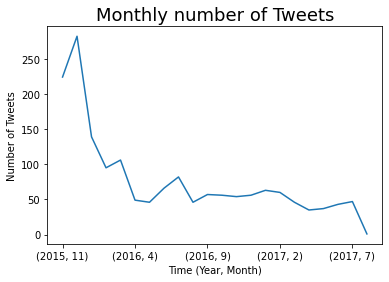

In [76]:
selected_data = df_twitter['tweet_id'].groupby([df_twitter['year'], df_twitter['month']]).count()
selected_data.plot(kind='line')
plt.title('Monthly number of Tweets', size=18)
plt.xlabel('Time (Year, Month)')
plt.ylabel('Number of Tweets')
plt.savefig('number_of_tweets_over_time')

fig = plt.gcf() 
fig.savefig('number_of_tweets_over_time.png',bbox_inches='tight');

1. Most tweets were near the launch date of the WeRateDogs acount, and it decreased rapidly after that. But near the beginning of 2016, it reached a stable point of tweets around 50; until it dropped in July 2017. 

In [63]:
df_twitter['dog_type'].value_counts()

golden_retriever      157
Labrador_retriever    108
Pembroke               95
Chihuahua              91
pug                    63
                     ... 
standard_schnauzer      1
EntleBucher             1
Irish_wolfhound         1
silky_terrier           1
Scotch_terrier          1
Name: dog_type, Length: 113, dtype: int64

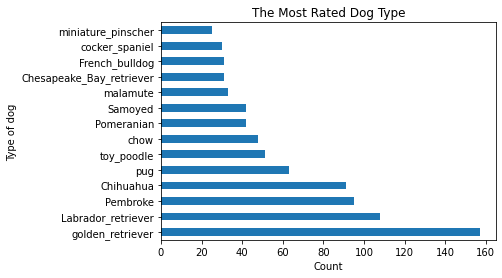

In [80]:
df_dog_type = df_twitter.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('The Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('The Most Rated Dog Type.png',bbox_inches='tight');

2. Golden Retriever is the most common dog type in this dataset

In [65]:
df_dog_type_mean = df_twitter.groupby('dog_type').mean()

In [66]:
df_dog_type_mean.head()

,tweet_id,rating_numerator,rating_denominator,year,month,day,rating,favorite_count,retweet_count,followers_count,friends_count
dog_type,,,,,,,,,,,
Afghan_hound,8.171385e+17,9.666667,10.0,2016.666667,4.666667,16.000000,9.666667,6284.000000,1603.000000,8.910294e+06,18.0
Airedale,7.184489e+17,9.833333,10.0,2015.583333,8.750000,15.916667,9.833333,4719.875000,1176.250000,8.910289e+06,18.0
American_Staffordshire_terrier,7.597284e+17,10.312500,10.0,2016.187500,5.250000,15.000000,10.312500,5318.666667,1688.888889,8.910292e+06,18.0
Appenzeller,7.939334e+17,11.000000,10.0,2016.500000,4.500000,18.500000,11.000000,NaN,NaN,NaN,NaN
Australian_terrier,7.785921e+17,11.500000,10.0,2016.500000,3.500000,7.000000,11.500000,9970.500000,2651.000000,8.910294e+06,18.0


In [67]:
df_dog_type_sorted = df_dog_type_mean['rating'].sort_values()

df_dog_type_sorted

dog_type
Japanese_spaniel                5.000000
soft-coated_wheaten_terrier     8.800000
Scotch_terrier                  9.000000
Walker_hound                    9.000000
Tibetan_terrier                 9.250000
                                 ...    
Irish_setter                   12.200000
Tibetan_mastiff                12.250000
briard                         12.333333
Saluki                         12.500000
Bouvier_des_Flandres           13.000000
Name: rating, Length: 113, dtype: float64

3. Japanese spaniel is the least popular dog type

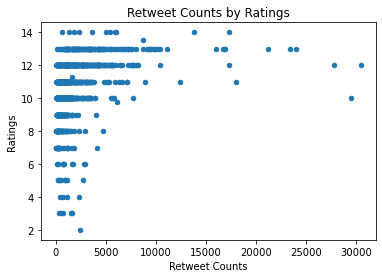

In [77]:
df_twitter.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings')

fig = plt.gcf()
fig.savefig('Retweet acounts and ratings.png',bbox_inches='tight');

4. The retweet counts does not necessarily corrolate with the highest ratings. 

References:

https://github.com/Abdul-al5aldi/DAND_Udacity_5/blob/master/wrangle_act.ipynb

https://github.com/latinacode/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb

https://github.com/StefaniePowazny/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb